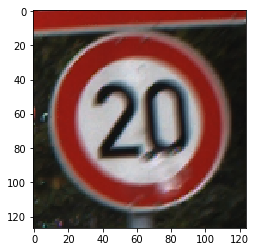

In [23]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from skimage.io import imread

from scipy.signal import convolve2d
from scipy.misc import imresize
img = imread('/home/tamerlan/CV/task3/00028.png', plugin ='matplotlib')
#im = imread('/home/tamerlan/CV/task2/img.png')
#img = imresize(img, (32,32))
implot = plt.imshow(img)
#im*=255
plt.imshow(img)
plt.show()

In [2]:
Dx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Dy = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

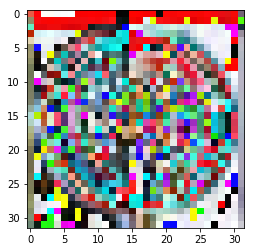

In [3]:
img_xR = convolve2d(img[...,0] ,Dx, 'same')
img_xG = convolve2d(img[...,1] ,Dx, 'same')
img_xB = convolve2d(img[...,2] ,Dx, 'same')
img_x = np.zeros((img_xR.shape[0],img_xR.shape[1],3))
img_x[...,0] = img_xR
img_x[...,1] = img_xG
img_x[...,2] = img_xB
plt.imshow(img_x)
plt.show()

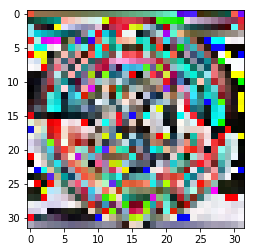

In [4]:
img_yR = convolve2d(img[...,0], Dy, 'same')
img_yG = convolve2d(img[...,1], Dy, 'same')
img_yB = convolve2d(img[...,2], Dy, 'same')
img_y = np.zeros((img_yR.shape[0],img_yR.shape[1],3))
img_y[...,0] = img_yR
img_y[...,1] = img_yG
img_y[...,2] = img_yB
plt.imshow(img_y)
plt.show()

In [5]:
print(img_x.shape,img_y.shape)

(32, 32, 3) (32, 32, 3)


In [6]:
gx = img_x
gy = img_y

#gx = convolve2d(img ,Dx, 'same')
#gy = convolve2d(img ,Dy, 'same')

magnitude = np.sqrt(gx**2 + gy**2)
orientation = (abs(np.arctan2(gy, gx)) * 180 / np.pi) 

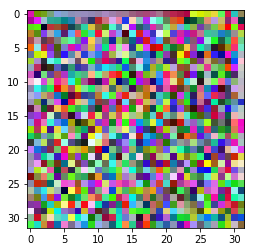

In [7]:
plt.imshow(magnitude)
plt.show()

In [8]:
orientation 

array([[[ 134.64849656,  137.6025622 ,  141.24191435],
        [  89.9125256 ,   91.02303019,   95.19442891],
        [  89.91225768,   87.95459151,   84.14398641],
        ..., 
        [  86.69813433,   92.85402497,   93.34579119],
        [  88.74721047,   91.63657704,   91.0291548 ],
        [  43.36342296,   59.54383399,   61.75286685]],

       [[ 178.51326774,  156.60552724,  155.88580146],
        [  71.56505118,   95.7743259 ,  100.98065001],
        [  59.03624347,   93.2397003 ,   93.36646066],
        ..., 
        [  84.09385889,  101.633634  ,   97.3343788 ],
        [  87.40436846,   98.42696902,   92.07003065],
        [  33.59750577,    7.50734667,   12.85563397]],

       [[ 169.33542448,  135.9877604 ,  130.16958004],
        [  81.32682595,   91.55868421,   92.10692129],
        [  82.47617956,   91.44759969,   92.40260947],
        ..., 
        [  86.74066273,   90.44761417,   89.3259631 ],
        [  88.50330116,   90.21952299,   88.47537723],
        [  52.95308

In [9]:
def max3(a,b,c):
    if a>=b and a>=c:
        return 0
    elif b>=c :
        return 1
    else :
        return 2

def get_hog_vector(orientation_block, magnitude_block):
    count_part_pi = 9
    hog_vector = np.zeros(count_part_pi)
    for i in range(orientation_block.shape[0]):
        for j in range(orientation_block.shape[1]):
            max_slice_num = max3(magnitude_block[i, j, 0], magnitude_block[i ,j, 1], magnitude_block[i, j, 2])
            freq_num = round(9*orientation_block[i,j][max_slice_num] / 180)
            hog_vector[int(freq_num)%9] += magnitude_block[i,j][max_slice_num]
    return hog_vector

block = np.zeros((4,4,9))
vector = np.empty(0)

for i in range(4):
    for j in range(4):
        orientation_block = orientation[i*8: (i+1)*8, j*8: (j+1)*8,:]
        magnitude_block = magnitude[i*8: (i+1)*8, j*8: (j+1)*8,:]
        block[i,j] = get_hog_vector(orientation_block, magnitude_block)
        #vector[i*36 + j*9: i*36 + (j+1)*9] = get_hog_vector(orientation_block, magnitude_block)

from numpy import linalg as LA
from math import sqrt
epsilon = 0.00001
for i in range(3):
    for j in range(3):
        con_v = np.concatenate((block[i, j], block[i + 1, j], block[i, j + 1], block[i + 1, j + 1]))
        con_v = con_v / sqrt(LA.norm(con_v)**2 + epsilon)
        vector = np.concatenate((vector,con_v))

In [10]:
round(9*46/180)

2

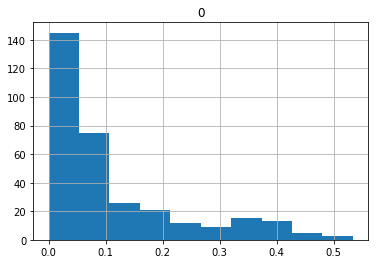

In [11]:
import pandas
pandas.DataFrame(vector).hist()
plt.show()

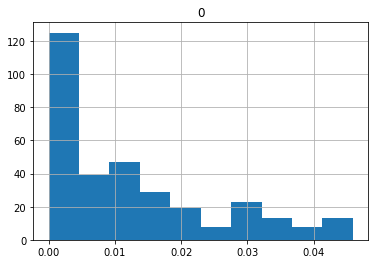

In [13]:
pandas.DataFrame(v).hist()
plt.show()

In [ ]:
np.arctan2(gy, gx)

In [12]:
from skimage.feature import hog
from skimage import color
v = hog(color.rgb2gray(img))

/home/tamerlan/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [37]:
print(v,vector)

[  7.10208578e-04   4.50799825e-03   1.58847843e-02   1.36642205e-02
   2.02915287e-02   6.00401534e-04   3.27172840e-05   5.09827269e-04
   1.24720045e-04   2.67879103e-03   3.65547255e-03   1.00241788e-02
   2.37368421e-02   4.17197006e-02   0.00000000e+00   8.35349487e-04
   0.00000000e+00   1.46625022e-03   0.00000000e+00   8.04831504e-04
   6.32831606e-04   6.49804414e-03   2.60772661e-02   2.81526581e-02
   1.52558907e-02   1.48725673e-03   9.51047633e-04   3.81394021e-02
   2.84115615e-02   1.29697489e-02   0.00000000e+00   0.00000000e+00
   3.71983428e-04   7.61117828e-04   1.38752147e-04   2.59405899e-03
   2.59979093e-03   3.20164770e-02   4.45070987e-02   1.76806071e-02
   1.24833712e-02   1.30899029e-02   1.96557319e-02   1.00977819e-02
   3.69942931e-03   5.58536233e-03   1.14466449e-02   1.66858718e-02
   1.07404103e-02   7.47202922e-03   1.31164864e-02   2.86370776e-02
   1.39770971e-02   4.22741435e-02   1.06895614e-03   2.31355958e-04
   6.97814046e-04   2.92836865e-04

In [100]:
import numpy as np
from sklearn.svm import SVC
from scipy.signal import convolve2d
from scipy.misc import imresize
from numpy import linalg as LA
from math import sqrt


def extract_hog(img):
    def max3(a,b,c):
        if a>=b and a>=c:
            return 0
        elif b>=c :
            return 1
        else :
            return 2
        
        
    def get_hog_vector(orientation_block, magnitude_block):
        count_part_pi = 9
        hog_vector = np.zeros(count_part_pi)
        for i in range(orientation_block.shape[0]):
            for j in range(orientation_block.shape[1]):
                max_slice_num = max3(magnitude_block[i, j, 0], magnitude_block[i ,j, 1], magnitude_block[i, j, 2])
                freq_num = round(9*orientation_block[i,j][max_slice_num] / 180)
                hog_vector[int(freq_num)%9] += magnitude_block[i,j][max_slice_num]
        return hog_vector
    
    
    img = imresize(img, (32,32))
    
    #kernels
    Dx = np.array([[-1, 0, 1]])
    Dy = np.array([[-1], [0], [1]])
    
    #compute gradient along X-axes
    gx = np.zeros((img.shape[0], img.shape[1], 3))
    gx[...,0] = convolve2d(img[...,0] ,Dx, 'same')
    gx[...,1] = convolve2d(img[...,1] ,Dx, 'same')
    gx[...,2] = convolve2d(img[...,2] ,Dx, 'same')
    
    #compute gradient along Y-axes
    gy = np.zeros((img.shape[0], img.shape[1], 3))
    gy[...,0] = convolve2d(img[...,0], Dy, 'same')
    gy[...,1] = convolve2d(img[...,1], Dy, 'same')
    gy[...,2] = convolve2d(img[...,2], Dy, 'same')
    
    magnitude = np.sqrt(gx**2 + gy**2)
    orientation = (abs(np.arctan2(gy, gx)) * 180 / np.pi) 
    
    block = np.zeros((4,4,9))
    full_hog_vector = np.empty(0)
    epsilon = 0.00001
    
    for i in range(4):
        for j in range(4):
            orientation_block = orientation[i*8: (i+1)*8, j*8: (j+1)*8,:]
            magnitude_block = magnitude[i*8: (i+1)*8, j*8: (j+1)*8,:]
            block[i,j] = get_hog_vector(orientation_block, magnitude_block)
    
    for i in range(3):
        for j in range(3):
            con_v = np.concatenate((block[i, j], block[i + 1, j], block[i, j + 1], block[i + 1, j + 1]))
            con_v = con_v / sqrt(LA.norm(con_v)**2 + epsilon)
            full_hog_vector = np.concatenate((full_hog_vector, con_v))
    return full_hog_vector

In [101]:
from os.path import join
from numpy import zeros

def read_gt(gt_dir):
        fgt = open(join(gt_dir, 'gt.csv'))
        next(fgt)
        lines = fgt.readlines()

        filenames = []
        labels = zeros(len(lines))
        for i, line in enumerate(lines):
            filename, label = line.rstrip('\n').split(',')
            filenames.append(filename)
            labels[i] = int(label)

        return filenames, labels

def extract_features(path, filenames):
        hog_length = len(extract_hog(imread(join(path, filenames[0]))))
        data = zeros((len(filenames), hog_length))
        for i in range(0, len(filenames)):
            filename = join(path, filenames[i])
            data[i, :] = extract_hog(imread(filename))
        return data

train_dir = '/home/tamerlan/CV/task3/tests/00_input/train'
train_filenames, train_labels = read_gt(train_dir)    
data = extract_features(train_dir, train_filenames)

In [102]:
train_features = data

In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,  StratifiedKFold
from time import time

cvl = StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
tic = time()
print('begin',tic)
model = SVC(kernel='rbf', C=1580,gamma=0.451)
v = cross_val_score(model, train_features, train_labels, cv = cvl)
toc = time()
print('kernel=rbf',v, '  time=', toc-tic)

begin 1507927788.6342585
kernel=rbf [ 0.96646963  0.9675874   0.96803839  0.96385173]   time= 1213.787190914154


In [112]:
temp_train_labels = train_labels[:26970]
temp_train_features = train_features[:26970]

In [144]:
tic = time()
print('begin',tic)
model = SVC(kernel='rbf', C=100, gamma = 0.05)
v = cross_val_score(model, temp_train_features, temp_train_labels, cv = 3)
toc = time()
print('kernel=rbf, C=100,gamma = 0.05',v, '  time=', toc-tic)

begin 1507764836.3326461
kernel=rbf, C=100,gamma = 0.05 [ 0.7701891   0.77575083  0.78854283]   time= 182.5196497440338


In [96]:

test_ft = np.zeros((19604,324))
test_ls = np.zeros(19604)
train_ft = np.zeros((19605,324))
train_ls = np.zeros(19605)
for i in range(train_features.shape[0]):
    if i%2==0:
        train_ft[i//2, :] = train_features[i]
        train_ls[i//2] = train_labels[i] 
    else :
        test_ft[i//2, :] = train_features[i]
        test_ls[i//2] =  train_labels[i] 

In [97]:

        
print('begin')
tic = time()
model = SVC(kernel='rbf', C=2**14,gamma=0.451)
#model = SVC(kernel='rbf', C=2**14,gamma=2**(-1.25))
model.fit(train_ft, train_ls)
y = model.predict(test_ft)
toc = time()

correct = 0
total = test_ls.shape[0]
for i in range(test_ls.shape[0]):
    if test_ls[i] == y[i]:
        correct += 1

accuracy = correct / total

print('accuracy = ',accuracy, '  time=', toc-tic)

begin
accuracy =  0.9561824117527036   time= 296.8133807182312


In [99]:
print('begin')
tic = time()
#model = SVC(kernel='rbf', C=1580,gamma=0.451)
model = SVC(kernel='rbf', C=2**14,gamma=2**(-1.25))
model.fit(train_ft, train_ls)
y = model.predict(test_ft)
toc = time()

correct = 0
total = test_ls.shape[0]
for i in range(test_ls.shape[0]):
    if test_ls[i] == y[i]:
        correct += 1

accuracy = correct / total

print('accuracy = ',accuracy, '  time=', toc-tic)

begin
accuracy =  0.9563354417465824   time= 333.732905626297


In [136]:
test_ls

array([  0.,   0.,   0., ...,  42.,  42.,  42.])

In [107]:
from math import exp

sigma = 1
S = 0
Mask = np.zeros((9,9))
for i in range(-4,5):
    for j in range(-4,5):
        Mask[i+4,j+4] = exp( -(((i/2)**2 + (j/2)**2) / (2*sigma**2) ))
        S += Mask[i+4,j+4]
S /= 9*9

In [105]:
Mask = imresize(Mask, (8,8)) 
Mask

array([[  2,  13,  25,  35,  35,  25,  13,   2],
       [ 12,  36,  67,  92,  92,  67,  36,  12],
       [ 25,  67, 123, 166, 166, 123,  67,  25],
       [ 35,  91, 166, 223, 223, 166,  91,  35],
       [ 35,  91, 166, 223, 223, 166,  91,  35],
       [ 25,  67, 123, 166, 166, 123,  67,  25],
       [ 12,  36,  67,  92,  92,  67,  36,  12],
       [  2,  13,  25,  35,  35,  25,  13,   2]], dtype=uint8)

In [108]:
Mask

array([[ 0.01831564,  0.04393693,  0.082085  ,  0.11943297,  0.13533528,
         0.11943297,  0.082085  ,  0.04393693,  0.01831564],
       [ 0.04393693,  0.10539922,  0.19691168,  0.2865048 ,  0.32465247,
         0.2865048 ,  0.19691168,  0.10539922,  0.04393693],
       [ 0.082085  ,  0.19691168,  0.36787944,  0.53526143,  0.60653066,
         0.53526143,  0.36787944,  0.19691168,  0.082085  ],
       [ 0.11943297,  0.2865048 ,  0.53526143,  0.77880078,  0.8824969 ,
         0.77880078,  0.53526143,  0.2865048 ,  0.11943297],
       [ 0.13533528,  0.32465247,  0.60653066,  0.8824969 ,  1.        ,
         0.8824969 ,  0.60653066,  0.32465247,  0.13533528],
       [ 0.11943297,  0.2865048 ,  0.53526143,  0.77880078,  0.8824969 ,
         0.77880078,  0.53526143,  0.2865048 ,  0.11943297],
       [ 0.082085  ,  0.19691168,  0.36787944,  0.53526143,  0.60653066,
         0.53526143,  0.36787944,  0.19691168,  0.082085  ],
       [ 0.04393693,  0.10539922,  0.19691168,  0.2865048 ,  0

In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3101568063920661806
]


In [47]:
import numpy as np
from sklearn.svm import SVC
from scipy.signal import convolve2d
from scipy.misc import imresize
from numpy import linalg as LA
from math import sqrt


def extract_hog(img):
    def max3(a,b,c):
        if a>=b and a>=c:
            return 0
        elif b>=c :
            return 1
        else :
            return 2
        
        
    def get_hog_vector(orientation_block, magnitude_block):
        count_part_pi = 9
        hog_vector = np.zeros(count_part_pi)
        for i in range(orientation_block.shape[0]):
            for j in range(orientation_block.shape[1]):
                max_slice_num = max3(magnitude_block[i, j, 0], magnitude_block[i ,j, 1], magnitude_block[i, j, 2])
                freq_num = round(9*orientation_block[i,j][max_slice_num] / 180)
                hog_vector[int(freq_num)%9] += magnitude_block[i,j][max_slice_num]
        return hog_vector
    
    
    img = imresize(img, (36,36))
    
    #kernels
    #Dx = np.array([[-1, 0, 1]])
    #Dy = np.array([[-1], [0], [1]])
    Dx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Dy = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    
    #compute gradient along X-axes
    gx = np.zeros((img.shape[0], img.shape[1], 3))
    gx[...,0] = convolve2d(img[...,0] ,Dx, 'same')
    gx[...,1] = convolve2d(img[...,1] ,Dx, 'same')
    gx[...,2] = convolve2d(img[...,2] ,Dx, 'same')
    
    #compute gradient along Y-axes
    gy = np.zeros((img.shape[0], img.shape[1], 3))
    gy[...,0] = convolve2d(img[...,0], Dy, 'same')
    gy[...,1] = convolve2d(img[...,1], Dy, 'same')
    gy[...,2] = convolve2d(img[...,2], Dy, 'same')
    
    magnitude = np.sqrt(gx**2 + gy**2)
    orientation = (abs(np.arctan2(gy, gx)) * 180 / np.pi) 
    
    block = np.zeros((6,6,9))
    full_hog_vector = np.empty(0)
    epsilon = 0.00001
    
    for i in range(4):
        for j in range(4):
            orientation_block = orientation[i*6: (i+1)*6, j*6: (j+1)*6,:]
            magnitude_block   =   magnitude[i*6: (i+1)*6, j*6: (j+1)*6,:]
            block[i,j] = get_hog_vector(orientation_block, magnitude_block)
    
    for i in range(3):
        for j in range(3):
            con_v = np.concatenate((block[i, j], block[i + 1, j], block[i, j + 1], block[i + 1, j + 1]))
            con_v = con_v / sqrt(LA.norm(con_v)**2 + epsilon)
            full_hog_vector = np.concatenate((full_hog_vector, con_v))
    return full_hog_vector

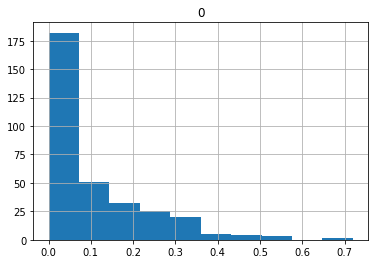

In [48]:
pandas.DataFrame(extract_hog(img)).hist()
plt.show()

In [49]:
temp = extract_hog(img)

In [50]:
len(temp)

324